In [138]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [114]:
data = pd.read_csv(".\\introducao-a-data-science-aula0\\aula0\\Consumo_cerveja.csv", delimiter=';')
data.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


# 1. Análise dos dados.

## 1.1. Comportamento da Variável dependente

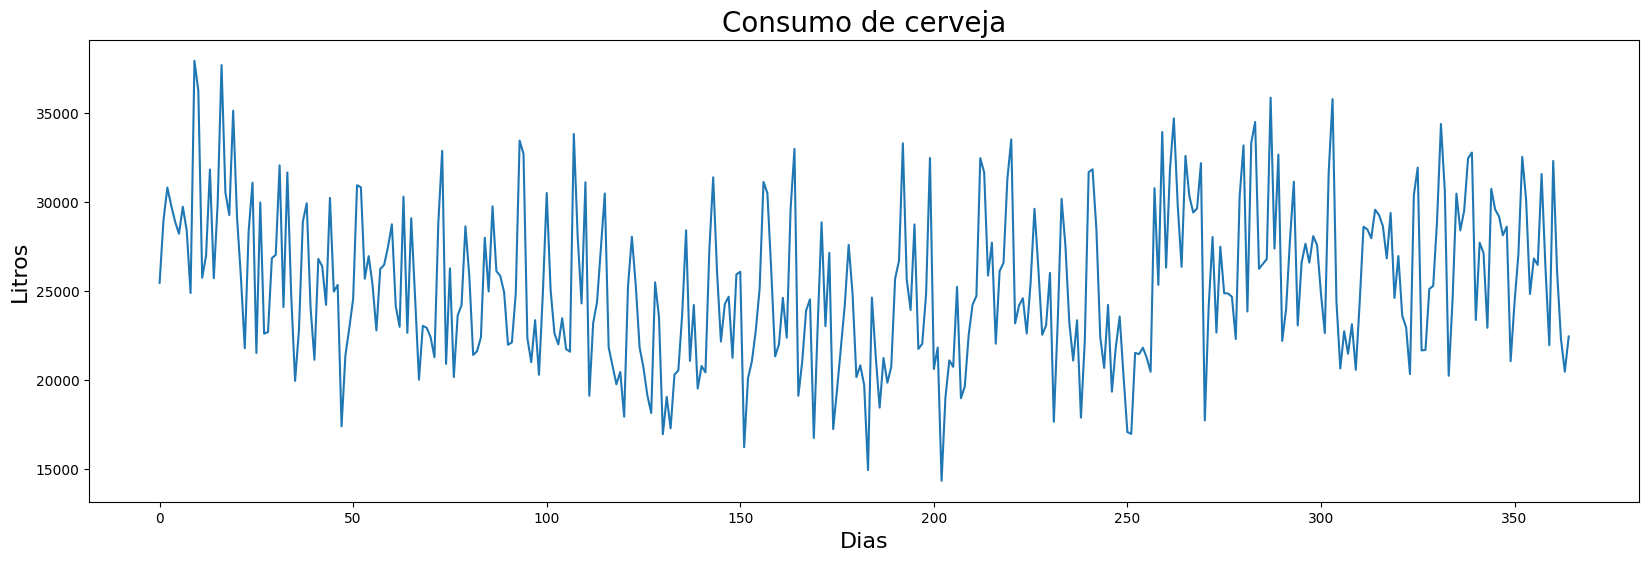

In [36]:
fig, ax = plt.subplots(figsize=(20,6))
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = data.consumo.plot()

## 1.2. Estatísticas Descritivas

In [22]:
data.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## 1.3. Correlação de variaveis

In [31]:
data[["temp_media", "temp_min", "temp_max", "chuva", "fds", "consumo"]].corr().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
chuva,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


<Axes: >

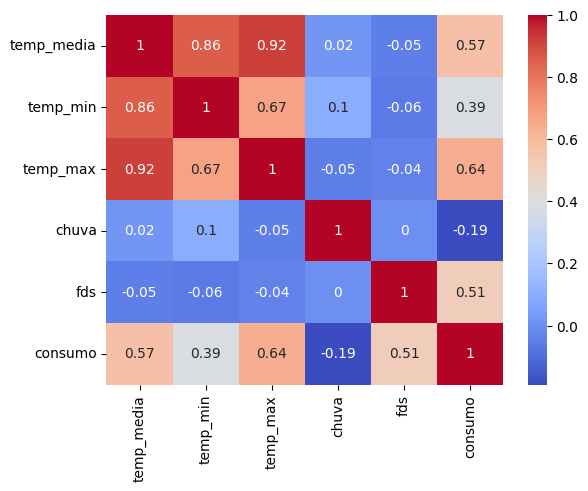

In [44]:
sns.heatmap(data[["temp_media", "temp_min", "temp_max", "chuva", "fds", "consumo"]].corr().round(2), annot=True, cmap='coolwarm')

## 1.4. Boxplot de Variaveis

<Axes: title={'center': 'Consumo de Cerveja'}, xlabel='consumo', ylabel='Litros'>

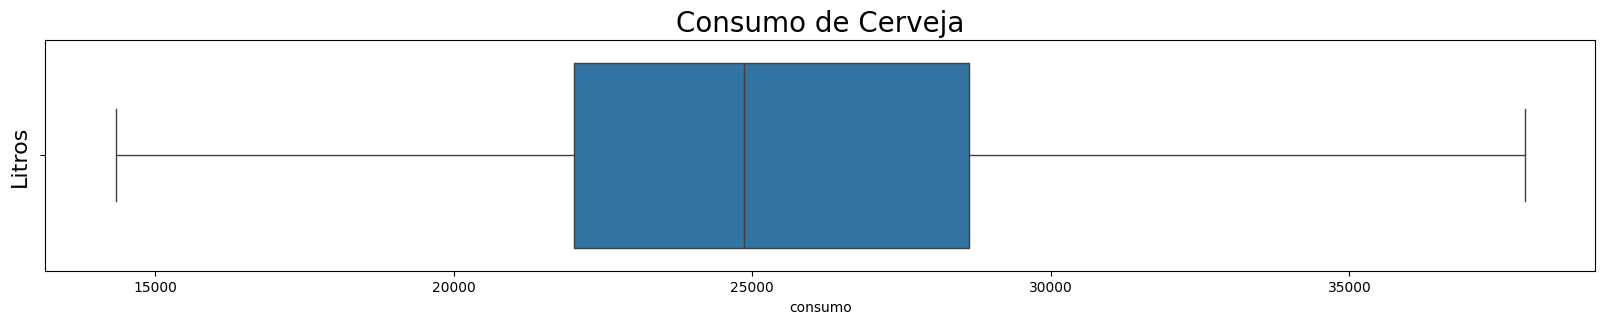

In [56]:
ax = sns.boxplot(data.consumo, orient='h')
ax.figure.set_size_inches(20,3)
ax.set_title('Consumo de Cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

C:\Users\ppeix\AppData\Local\Temp\ipykernel_11956\1438661219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y='consumo', x='fds', data=data, orient='v', width=0.5, palette=palette)
C:\Users\ppeix\AppData\Local\Temp\ipykernel_11956\1438661219.py:3: UserWarning: The palette list has more values (12) than needed (2), which may not be intended.
  ax = sns.boxplot(y='consumo', x='fds', data=data, orient='v', width=0.5, palette=palette)


<Axes: title={'center': 'Consumo em função do Final de Semana'}, xlabel='Final de Semana', ylabel='Litros'>

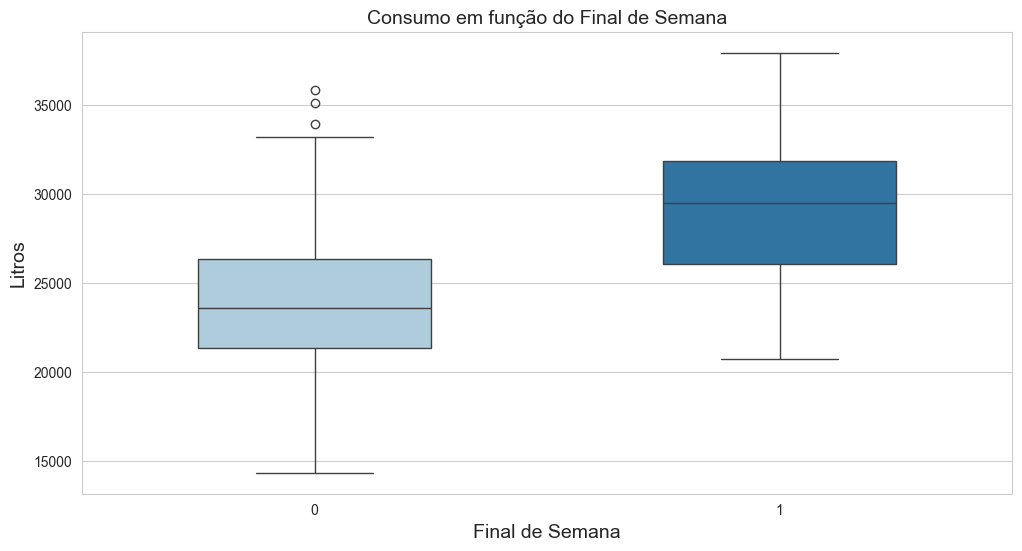

In [68]:
palette = sns.color_palette("Paired")
sns.set_style("whitegrid")
ax = sns.boxplot(y='consumo', x='fds', data=data, orient='v', width=0.5, palette=palette)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo em função do Final de Semana', fontsize=14)
ax.set_ylabel('Litros', fontsize=14)
ax.set_xlabel('Final de Semana', fontsize=14)
ax

## 1.5. Distribuição de Frequencias

C:\Users\ppeix\AppData\Local\Temp\ipykernel_11956\3618089208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.consumo)


<Axes: title={'center': 'Distribuição do Consumo de Cerveja'}, xlabel='consumo', ylabel='Consumo de cerveja (Litros)'>

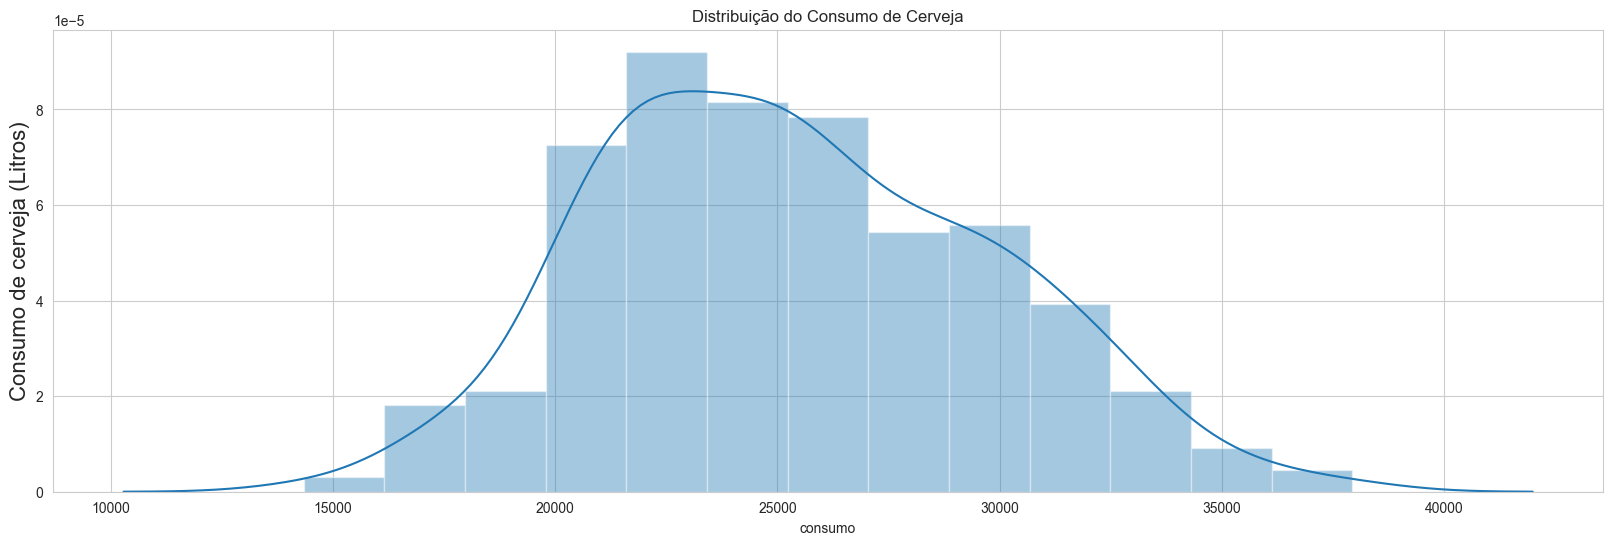

In [72]:
ax = sns.distplot(data.consumo)
ax.figure.set_size_inches(20,6)
ax.set_title('Distribuição do Consumo de Cerveja')
ax.set_ylabel('Consumo de cerveja (Litros)', fontsize=16)
ax

[]

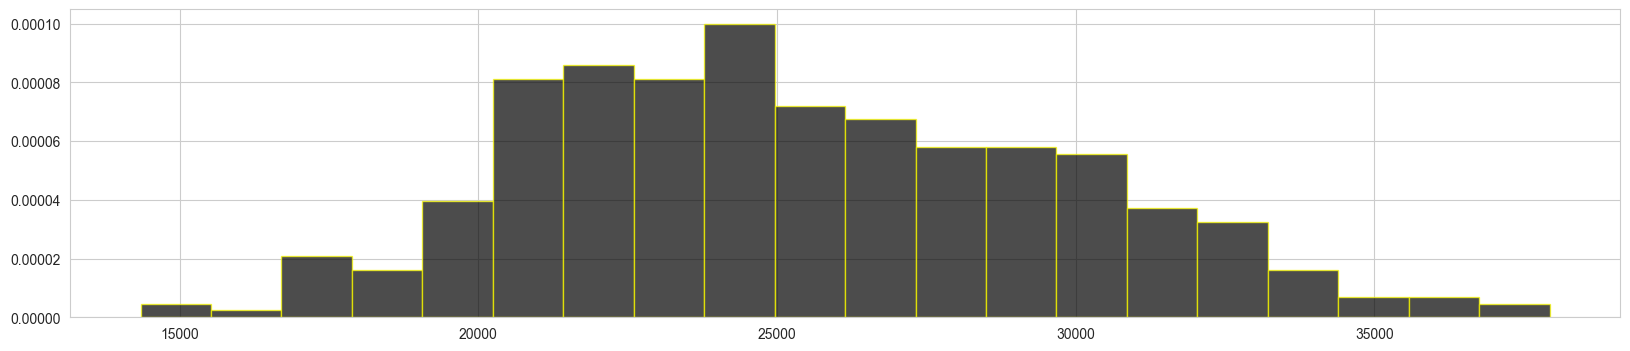

In [86]:
plt.figure(figsize=(20,4))
plt.hist(data.consumo, color='black', edgecolor='yellow', density=True, alpha=0.7, bins=20)
plt.plot()

C:\Users\ppeix\AppData\Local\Temp\ipykernel_11956\2463235417.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.temp_max)


Text(0.5, 1.0, 'Temperatura máxima')

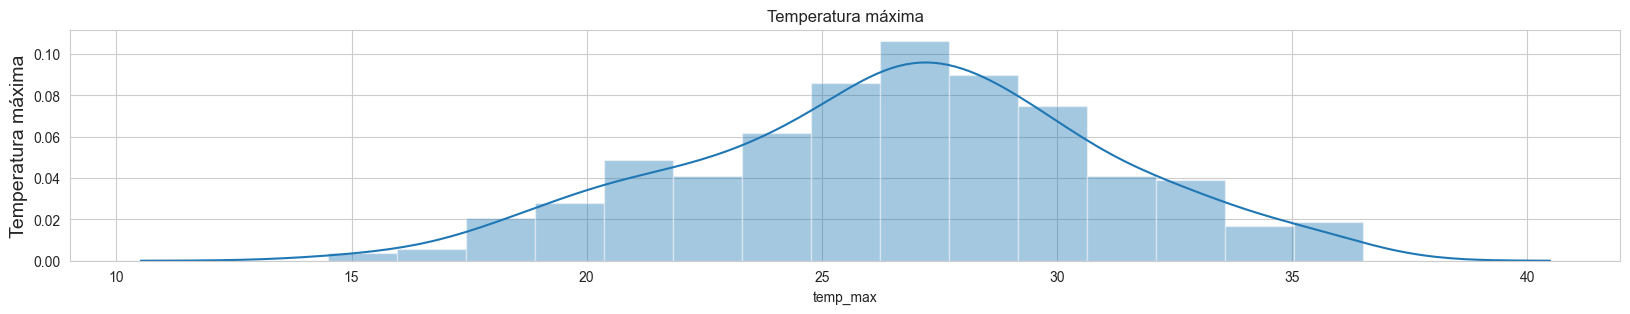

In [92]:
ax = sns.distplot(data.temp_max)
ax.figure.set_size_inches(20,3)
ax.set_ylabel('Temperatura máxima', fontsize=14)
ax.set_title('Temperatura máxima')

## 1.6. Parplot

Text(0.5, 0.98, 'Dispersão entre as variáveis')

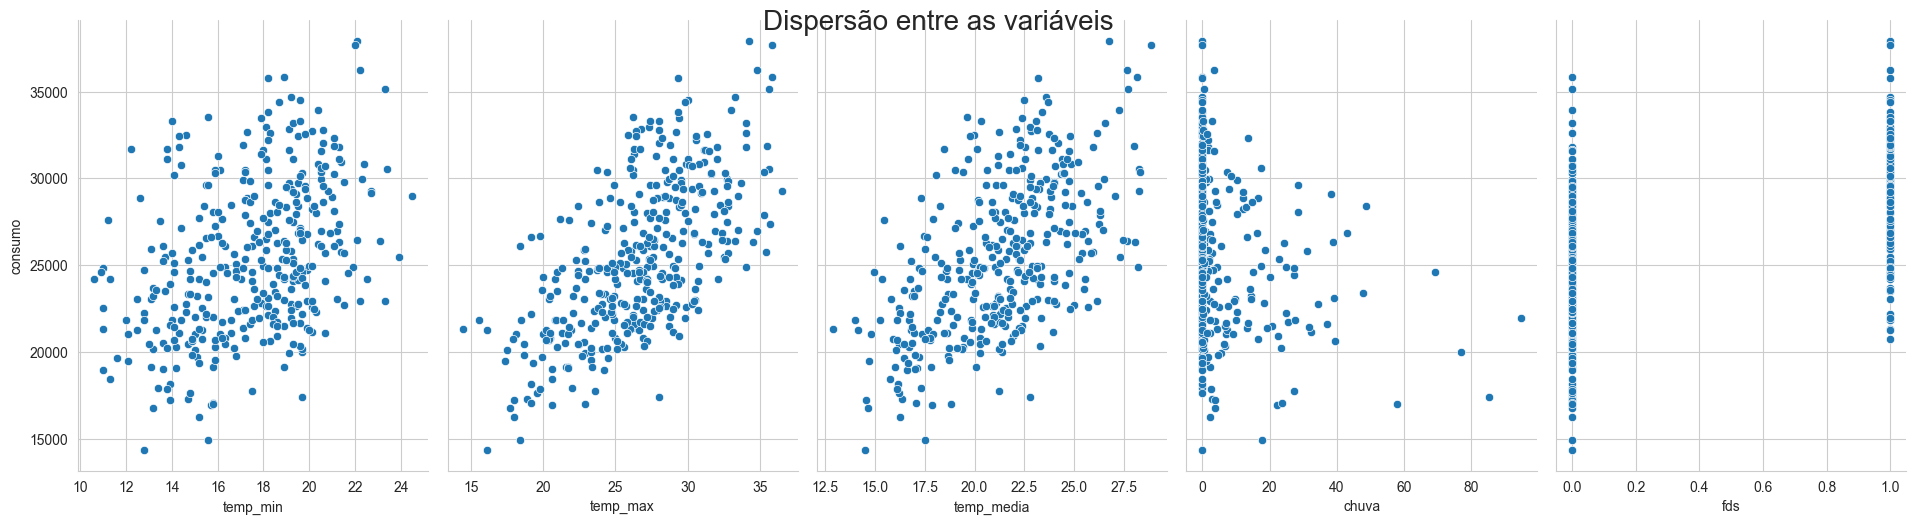

In [96]:
ax = sns.pairplot(data, y_vars='consumo', x_vars=['temp_min', 'temp_max', 'temp_media', 'chuva', 'fds'])
ax.figure.set_size_inches(20,6)
ax.fig.suptitle('Dispersão entre as variáveis', fontsize=20)

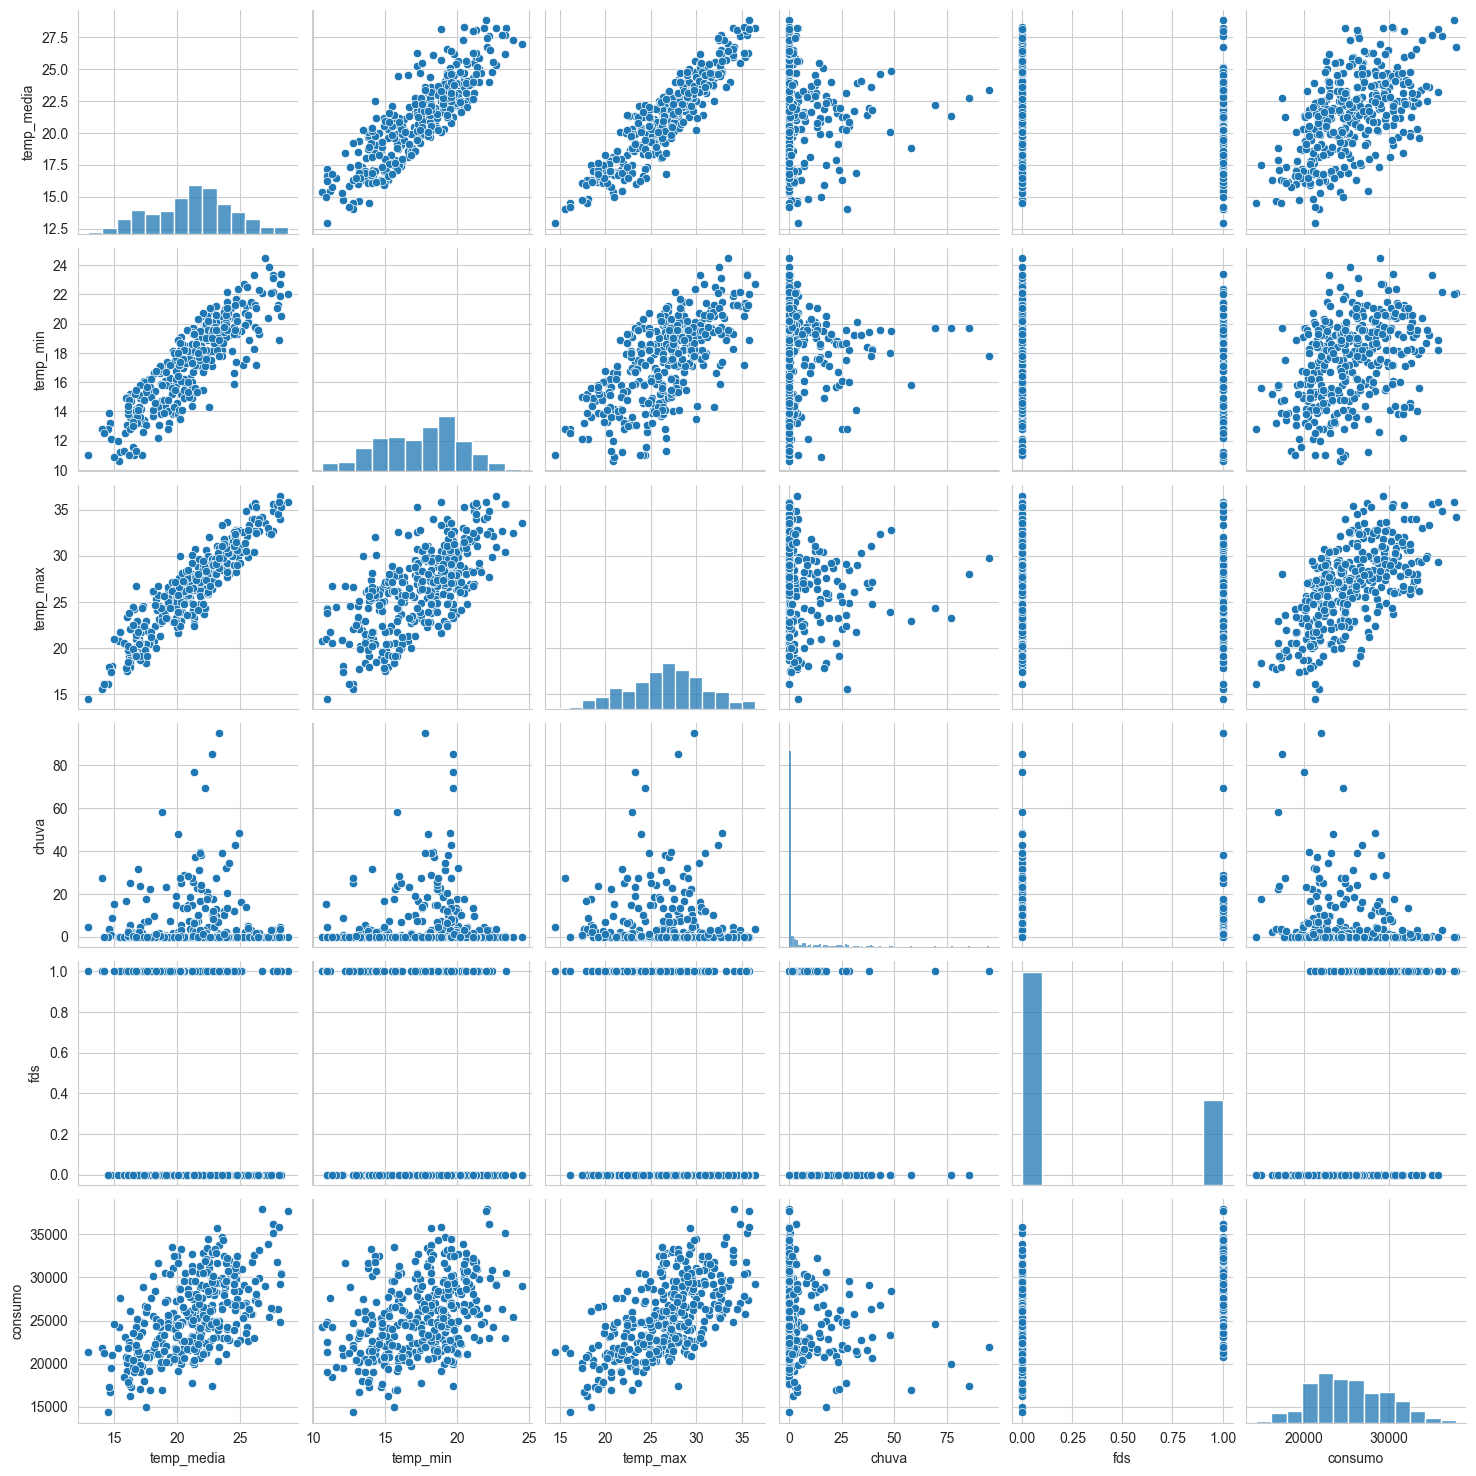

In [97]:
sns.pairplot(data)

## 1.7. Joinplot

Text(0.5, 0.98, 'Dispersão - Consumo x Temperatura')

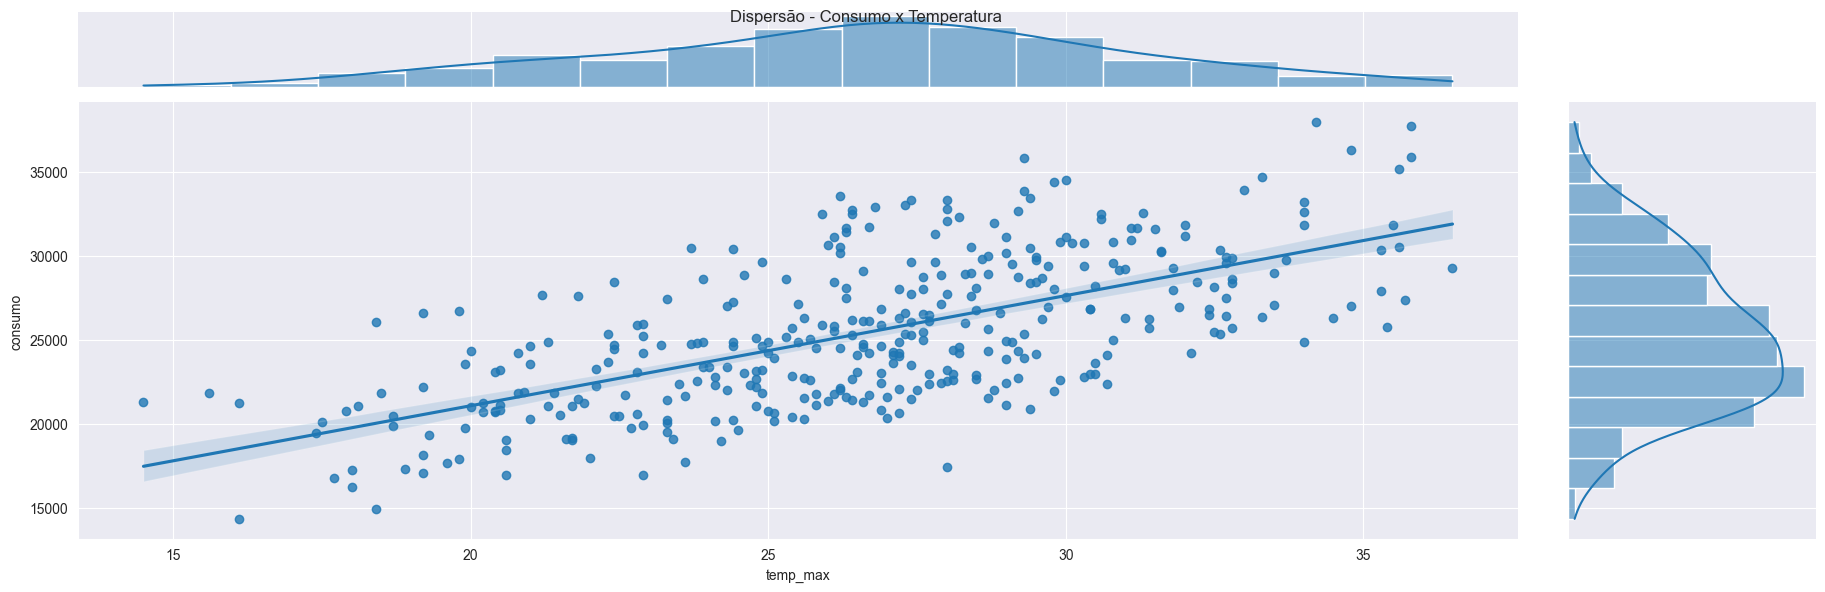

In [104]:
sns.set_style("darkgrid")
ax = sns.jointplot(x='temp_max', y='consumo', data=data, kind='reg')

ax.figure.set_size_inches(20,6)
ax.fig.suptitle('Dispersão - Consumo x Temperatura')


## 1.8. Lmplot 

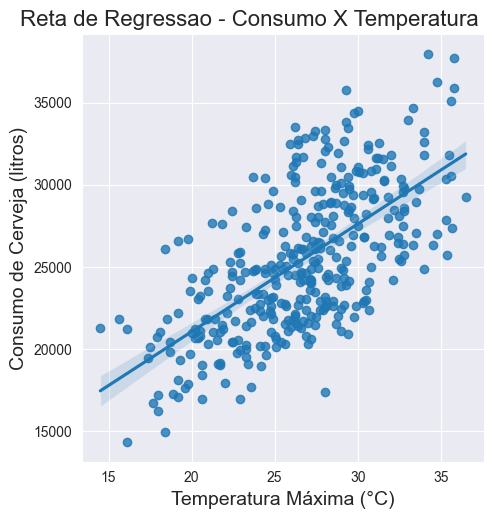

In [107]:
ax= sns.lmplot(x="temp_max", y="consumo", data=data)
ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

# 2. Regressão Linear

## 2.1 Datasets de Treino e Teste

In [119]:
x = data[['temp_max', 'chuva', 'fds']]
y = data.consumo

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)
x_train.shape, x_test.shape, x.shape

((255, 3), (110, 3), (365, 3))

## 2.2. Modelo

In [122]:
modelo_LR = LinearRegression()
modelo_LR.fit(x_train, y_train)

LinearRegression()

In [125]:
print('R² = {}'.format(modelo_LR.score(x_train, y_train).round(2)))

R² = 0.73


In [126]:
y_previsto = modelo_LR.predict(x_test)
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


## 2.3. Predições Pontuais

In [127]:
x_test

,temp_max,chuva,fds
5,30.5,12.2,0
83,27.9,0.0,0
40,29.0,32.2,0
143,26.3,0.0,1
193,28.7,0.0,0
...,...,...,...
46,27.3,22.7,0
229,26.5,0.0,0
45,27.6,17.4,1
329,27.4,0.0,0


In [129]:
entrada = x_test[0:1]
modelo_LR.predict(entrada)

array([26094.90177526])

In [130]:
y_test[0:1]

5    28218
Name: consumo, dtype: int64

In [132]:
temp_max=40
chuva=0 
fds=1 
entrada = [[temp_max, chuva, fds]]
print('{0:.2f} litros'.format(modelo_LR.predict(entrada)[0]))

38742.53 litros


C:\Users\ppeix\OneDrive\Área de Trabalho\Codes\Alura\venv_alura\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 2.4. Coeficientes estimados

In [144]:
pd.DataFrame(data=np.append(modelo_LR.intercept_.round(2), modelo_LR.coef_.round(2)), index=['Intercepto', 'Temperatura Máxima', 'Chuva', 'FDS'], columns=['Parâmetros'])

,Parâmetros
Intercepto,5951.98
Temperatura Máxima,684.74
Chuva,-60.78
FDS,5401.08


## 2.5. Análise Gráfica das Predições 

In [147]:
y_previsto_treinamento = modelo_LR.predict(x_train)
print('R² = %s' % metrics.r2_score(y_train, y_previsto_treinamento).round(2))

R² = 0.73


<Axes: title={'center': 'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

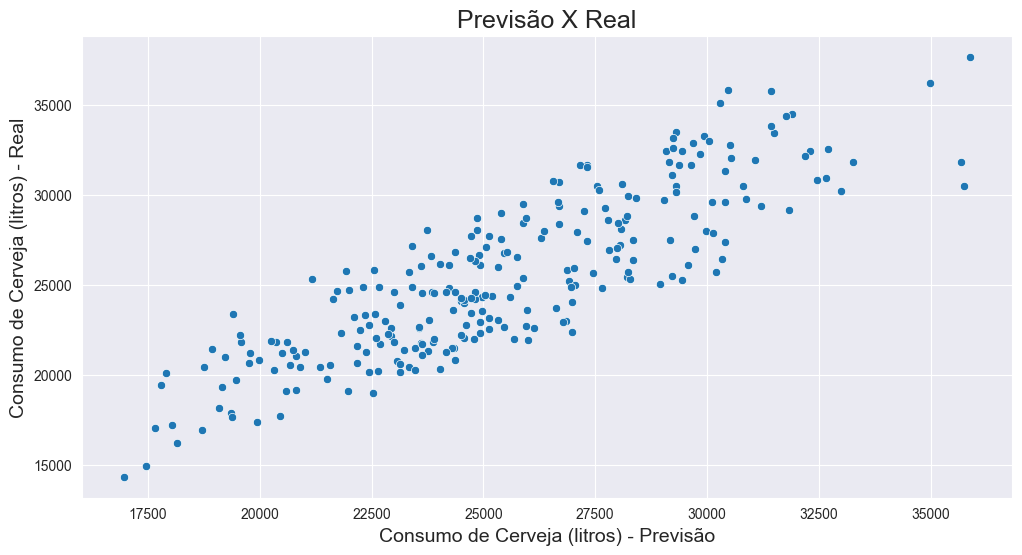

In [148]:
ax = sns.scatterplot(x=y_previsto_treinamento, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

In [152]:
residuo = y_train - y_previsto_treinamento

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos²'>

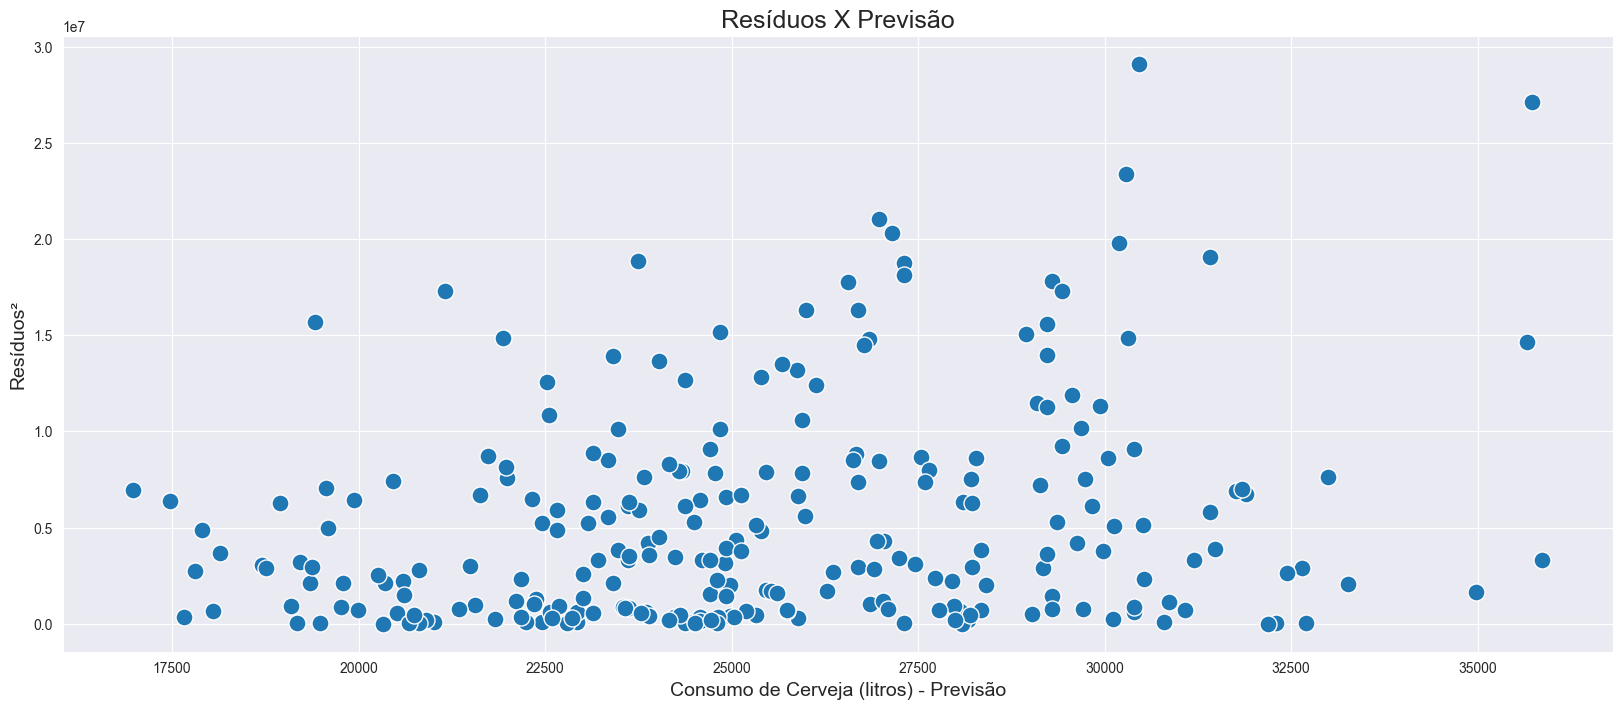

In [153]:
#Verificação se a variância dos resíduos é constante (homocedasticidade)
#multiplique o residuo ao quadrado para que todos os residuos sejam positivos e a analise possa ser feita de maneira mais clara
ax = sns.scatterplot(x=y_previsto_treinamento, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

C:\Users\ppeix\AppData\Local\Temp\ipykernel_11956\1259251038.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo, bins=50)


<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Litros', ylabel='Density'>

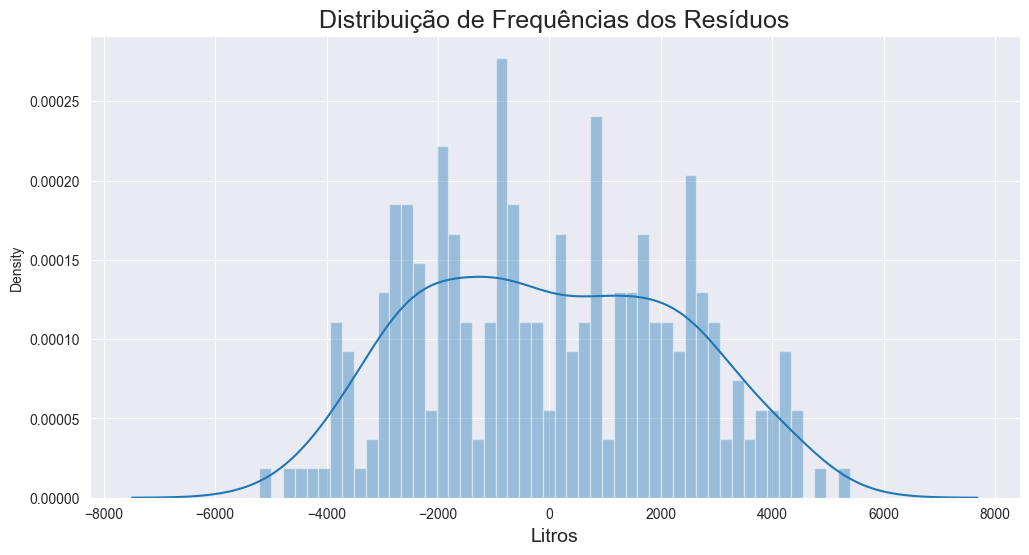

In [155]:
ax = sns.distplot(residuo, bins=50)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax